# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import yellowbrick
from yellowbrick.style import set_palette
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline


# Import Dataset


*   gunakan link ini untuk mengimport dataset : https://raw.githubusercontent.com/bayuazra23/datasets/main/Data%20Pergerakan%20Harga.csv
*   Simpan dataset dalam variabel bernama "df"
*   Variabel terikat untuk dataset ini adalah Pergerakan Harga, dengan kolom lain sebagai variable bebas




In [ ]:
url = 'https://raw.githubusercontent.com/bayuazra23/datasets/main/Data%20Pergerakan%20Harga.csv'
df = pd.read_csv(url)

In [ ]:
df

,No,Tanggal,Lokasi,Aktual Harga,Aktual Produksi,Aktual Luas Tanam,Aktual Curah Hujan,Aktual Bencana,Aktual Luas Terkena Hama,Stabilitas Harga,Musim,Banjir,Prosentase Hama,Hama,Pergerakan Harga,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,2008-01-01,1,5006,288577,194599,240.9,1.0,0.0,Stabil,Penghujan,Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
1,11,2008-01-01,11,5112,7722,12653,463.0,0.0,0.0,Stabil,Kemarau,Banjir,0.000000,Tidak Ada Hama,Naik,NaN,NaN,NaN,NaN
2,12,2008-02-01,1,5032,709949,76497,116.5,1.0,0.0,Stabil,Penghujan,Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
3,23,2008-03-01,1,4878,1622137,121151,242.4,1.0,0.0,Stabil,Penghujan,Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
4,34,2008-04-01,1,4745,1957305,260823,297.1,1.0,0.0,Stabil,Penghujan,Tidak Ada Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1123,2016-07-01,1,8820,646413,83590,182.3,1.0,6090.0,STABIL,Kemarau,Ada Bencana,2.863646,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
104,1134,2016-08-01,1,8747,150588,68699,128.7,1.0,7020.0,STABIL,Penghujan,Ada Bencana,3.170074,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
105,1145,2016-09-01,1,8725,335396,34712,286.2,1.0,4833.0,STABIL,Penghujan,Ada Bencana,5.953522,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
106,1156,2016-10-01,1,8769,2149952,79631,362.3,1.0,5590.0,STABIL,Penghujan,Ada Bencana,7.261036,Tidak Ada Hama,Naik,NaN,NaN,NaN,NaN


## Lakukan Label encoding untuk kolom kategorikal



```
# contoh proses label encoding
for col in df[['sex','island']]:
  df[col] = LabelEncoder().fit_transform(df[col])
```



In [ ]:
for col in df[['Stabilitas Harga','Musim', 'Banjir', 'Hama', 'Pergerakan Harga']]:
  df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df

,No,Tanggal,Lokasi,Aktual Harga,Aktual Produksi,Aktual Luas Tanam,Aktual Curah Hujan,Aktual Bencana,Aktual Luas Terkena Hama,Stabilitas Harga,Musim,Banjir,Prosentase Hama,Hama,Pergerakan Harga,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,2008-01-01,1,5006,288577,194599,240.9,1.0,0.0,1,1,1,0.000000,1,1,NaN,NaN,NaN,NaN
1,11,2008-01-01,11,5112,7722,12653,463.0,0.0,0.0,1,0,1,0.000000,1,0,NaN,NaN,NaN,NaN
2,12,2008-02-01,1,5032,709949,76497,116.5,1.0,0.0,1,1,1,0.000000,1,1,NaN,NaN,NaN,NaN
3,23,2008-03-01,1,4878,1622137,121151,242.4,1.0,0.0,1,1,1,0.000000,1,1,NaN,NaN,NaN,NaN
4,34,2008-04-01,1,4745,1957305,260823,297.1,1.0,0.0,1,1,2,0.000000,1,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1123,2016-07-01,1,8820,646413,83590,182.3,1.0,6090.0,0,0,0,2.863646,1,1,NaN,NaN,NaN,NaN
104,1134,2016-08-01,1,8747,150588,68699,128.7,1.0,7020.0,0,1,0,3.170074,1,1,NaN,NaN,NaN,NaN
105,1145,2016-09-01,1,8725,335396,34712,286.2,1.0,4833.0,0,1,0,5.953522,1,1,NaN,NaN,NaN,NaN
106,1156,2016-10-01,1,8769,2149952,79631,362.3,1.0,5590.0,0,1,0,7.261036,1,0,NaN,NaN,NaN,NaN


# EDA

**Pertanyaan** : Buatlah 3 buah business case beserta kebutuhan analisis untuk melakukan eksplorasi pada dataset yang ada, jawab business case tersebut dengan berbagai metode statistik.  





In [ ]:
# "Ini adalah contoh sebuah business case.  Business case ini diperlukan untuk melihat hubungan pergerakan nilai Y terhadap kondisi X"
[kode]

In [ ]:
url = 'https://raw.githubusercontent.com/bayuazra23/datasets/main/Data%20Pergerakan%20Harga.csv'
df_not_encoded = pd.read_csv(url)
df_not_encoded

,No,Tanggal,Lokasi,Aktual Harga,Aktual Produksi,Aktual Luas Tanam,Aktual Curah Hujan,Aktual Bencana,Aktual Luas Terkena Hama,Stabilitas Harga,Musim,Banjir,Prosentase Hama,Hama,Pergerakan Harga,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,2008-01-01,1,5006,288577,194599,240.9,1.0,0.0,Stabil,Penghujan,Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
1,11,2008-01-01,11,5112,7722,12653,463.0,0.0,0.0,Stabil,Kemarau,Banjir,0.000000,Tidak Ada Hama,Naik,NaN,NaN,NaN,NaN
2,12,2008-02-01,1,5032,709949,76497,116.5,1.0,0.0,Stabil,Penghujan,Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
3,23,2008-03-01,1,4878,1622137,121151,242.4,1.0,0.0,Stabil,Penghujan,Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
4,34,2008-04-01,1,4745,1957305,260823,297.1,1.0,0.0,Stabil,Penghujan,Tidak Ada Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1123,2016-07-01,1,8820,646413,83590,182.3,1.0,6090.0,STABIL,Kemarau,Ada Bencana,2.863646,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
104,1134,2016-08-01,1,8747,150588,68699,128.7,1.0,7020.0,STABIL,Penghujan,Ada Bencana,3.170074,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
105,1145,2016-09-01,1,8725,335396,34712,286.2,1.0,4833.0,STABIL,Penghujan,Ada Bencana,5.953522,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
106,1156,2016-10-01,1,8769,2149952,79631,362.3,1.0,5590.0,STABIL,Penghujan,Ada Bencana,7.261036,Tidak Ada Hama,Naik,NaN,NaN,NaN,NaN


In [ ]:
descriptive_stats = df.describe()
descriptive_stats

,No,Lokasi,Aktual Harga,Aktual Produksi,Aktual Luas Tanam,Aktual Curah Hujan,Aktual Bencana,Aktual Luas Terkena Hama,Stabilitas Harga,Musim,Banjir,Prosentase Hama,Hama,Pergerakan Harga,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,108.000000,108.000000,108.000000,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,0.0,0.0,0.0
mean,578.694444,1.092593,6891.981481,9.267025e+05,158616.370370,204.021296,0.712963,7420.292130,0.222222,0.611111,0.851852,5.963402,0.805556,0.351852,NaN,NaN,NaN
std,344.200644,0.962250,1317.845565,5.656200e+05,85387.521207,140.974084,0.454488,6474.649355,0.417678,0.489771,1.182543,6.317281,0.397618,0.479774,NaN,NaN,NaN
min,1.000000,1.000000,4745.000000,7.722000e+03,12653.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,284.250000,1.000000,5634.750000,5.180605e+05,93431.000000,87.775000,0.000000,2792.250000,0.000000,0.000000,0.000000,1.796275,1.000000,0.000000,NaN,NaN,NaN
50%,578.500000,1.000000,7072.500000,7.145725e+05,133762.500000,188.600000,1.000000,6514.000000,0.000000,1.000000,0.000000,4.134998,1.000000,0.000000,NaN,NaN,NaN
75%,872.750000,1.000000,7631.750000,1.196968e+06,222202.500000,291.150000,1.000000,10985.250000,0.000000,1.000000,2.000000,7.824904,1.000000,1.000000,NaN,NaN,NaN
max,1167.000000,11.000000,9142.000000,2.617491e+06,382951.000000,636.900000,1.000000,36068.000000,1.000000,1.000000,3.000000,29.723454,1.000000,1.000000,NaN,NaN,NaN


In [ ]:
columns_to_drop = ['Tanggal', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']
df.drop(columns_to_drop, axis=1, inplace=True)

Berapa rata-rata aktual produksi pada saat musim penghujan?

In [ ]:
# Rata-rata aktual produksi pada saat musim penghujan
rata_rata_penghujan = df_not_encoded[df_not_encoded['Musim'] == 'Penghujan']['Aktual Produksi'].mean()
print(f"Rata-rata produksi pada musim penghujan: {rata_rata_penghujan}")

Rata-rata produksi pada musim penghujan: 943704.303030303


Berapa nilai aktual harga dan aktual produksi tertinggi?

In [ ]:
# Nilai aktual harga dan aktual produksi tertinggi
max_harga = df_not_encoded['Aktual Harga'].max()
max_produksi = df_not_encoded['Aktual Produksi'].max()

print(f"Nilai tertinggi Aktual Harga: {max_harga}")
print(f"Nilai tertinggi Aktual Produksi: {max_produksi}")

Nilai tertinggi Aktual Harga: 9142
Nilai tertinggi Aktual Produksi: 2617491


Lebih banyak yang naik atau turun pada pergerakan harga diatas?

In [ ]:
# Pergerakan harga
jumlah_naik = (df_not_encoded['Pergerakan Harga'] == 'Naik').sum()
jumlah_turun = (df_not_encoded['Pergerakan Harga'] == 'Turun').sum()

if jumlah_naik > jumlah_turun:
    print("Lebih banyak nilai naik dalam kolom Pergerakan Harga")
elif jumlah_turun > jumlah_naik:
    print("Lebih banyak nilai turun dalam kolom Pergerakan Harga")
else:
    print("Jumlah nilai naik sama dengan jumlah nilai turun dalam kolom Pergerakan Harga")

Lebih banyak nilai naik dalam kolom Pergerakan Harga


# Visualisasi Data

**Pertanyaan** : anda akan diminta untuk membuat sebuah visualisasi untuk setiap jenis grafik yang sudah dipelajari.  Mengenai data yang digunakan untuk setiap grafik, lakukan analisis terhadap dataset, lalu tentukan kolom yang cocok untuk masing-masing jenis grafik. Sertakan reasoning terhadap grafik yang dibuat menggunakan komen, perhatikan contoh cell dibawah

## contoh

In [ ]:
#Grafik barplot untuk membandingkan jumlah pinguin dari setiap pulau
[kode]

## Barplot



```
# contoh
housing_ames.data.GarageType.value_counts().plot(kind='bar')
plt.show()
```



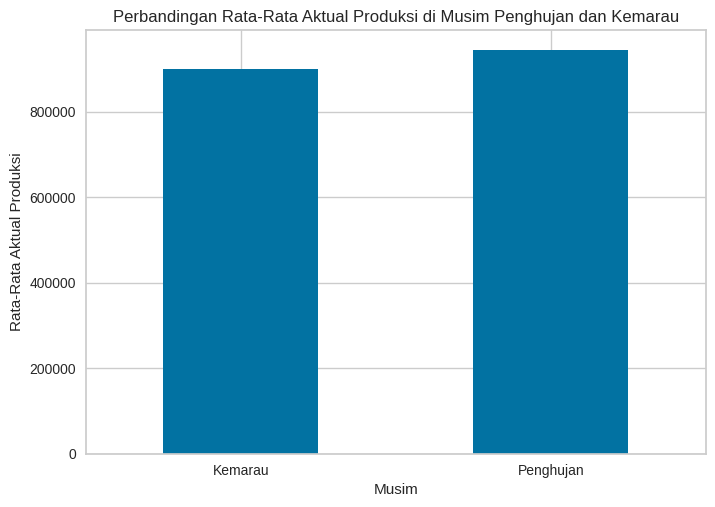

In [ ]:
# Grafik barplot untuk membandingkan rata-rata aktual produksi berdasarkan musim
rata_rata_musim = df_not_encoded.groupby('Musim')['Aktual Produksi'].mean()
fig, ax = plt.subplots()
rata_rata_musim.plot(kind='bar', ax=ax)
plt.title('Perbandingan Rata-Rata Aktual Produksi di Musim Penghujan dan Kemarau')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Aktual Produksi')
plt.xticks(rotation=0)
plt.show()

## Line Graph



```
# contoh
amtrak.plot(x='date', y='passengers', figsize=(15,8))
```



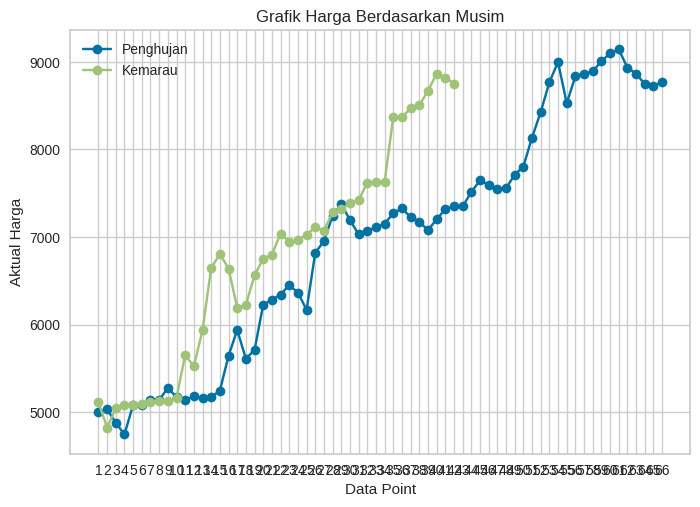

In [ ]:
# Grafik line graph terkait aktual harga berdasarkan musimx_values_penghujan = np.arange(len(harga_penghujan))
x_values_penghujan = np.arange(len(harga_penghujan))
x_values_kemarau = np.arange(len(harga_kemarau))
plt.plot(x_values_penghujan, harga_penghujan, marker='o', label='Penghujan')
plt.plot(x_values_kemarau, harga_kemarau, marker='o', label='Kemarau')
plt.title('Grafik Harga Berdasarkan Musim')
plt.xlabel('Data Point')
plt.ylabel('Aktual Harga')
plt.xticks(np.arange(len(harga_penghujan)), range(1, len(harga_penghujan) + 1))
plt.legend()
plt.show()

## Boxplot



```
# Contoh
housing_df.boxplot(column='AveOccup')
```



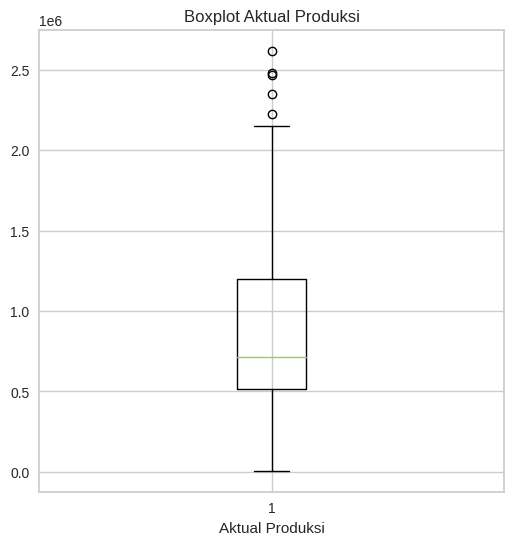

In [ ]:
# Grafik boxplot untuk mendeteksi outliers pada kolom Aktual Produksi
plt.figure(figsize=(6, 6))
plt.boxplot(df_not_encoded['Aktual Produksi'])
plt.title('Boxplot Aktual Produksi')
plt.xlabel('Aktual Produksi')
plt.show()

## Histogram



```
# contoh
fig, axis = plt.subplots(figsize=(20, 8))
housing_df.hist(ax=axis)
plt.show()
```



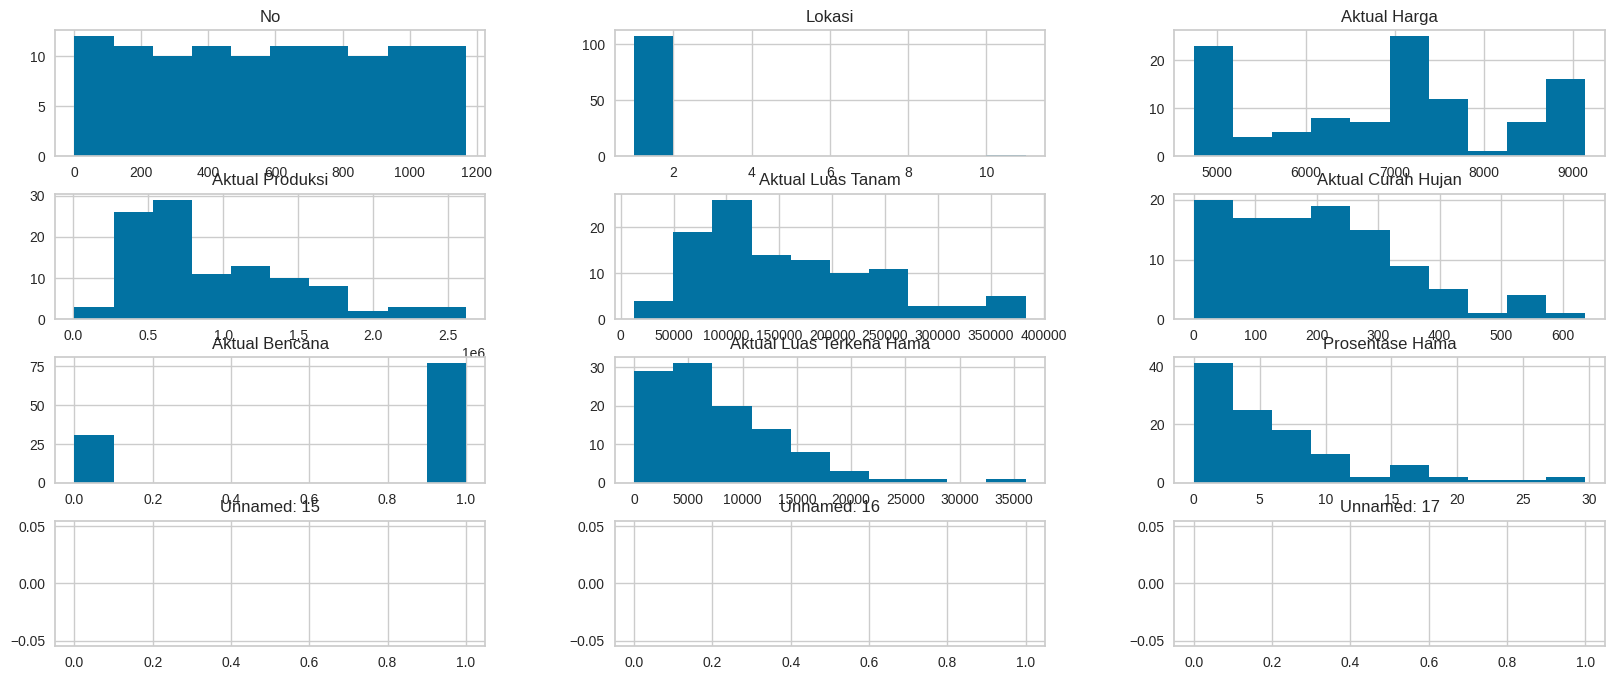

In [ ]:
# Grafik histogram untuk persebaran frekuensi data kuantitatif pada dataset harga
fig, axis = plt.subplots(figsize=(20,8))
df_not_encoded.hist(ax=axis)
plt.show()

# Data Mining

**Pertanyaan** :


*   Buatlah model menggunakan masing-masing algoritma
*   Lakukan spliting data dengan rasio train:test sebesar 80:20
*   Tampilkan juga classification report untuk masing-masing model




```
# contoh
classifier=GaussianNB()
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier=DecisionTreeClassifier()
classifier = LogisticRegression()
```



## Data Preparation



```
# Contoh
X = data_nb.iloc[:, [1,2,3,4]].values
y = data_nb.iloc[:, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
```



## Naive Bayes

In [ ]:
data_nb = df
data_nb

,No,Lokasi,Aktual Harga,Aktual Produksi,Aktual Luas Tanam,Aktual Curah Hujan,Aktual Bencana,Aktual Luas Terkena Hama,Stabilitas Harga,Musim,Banjir,Prosentase Hama,Hama,Pergerakan Harga
0,1,1,5006,288577,194599,240.9,1.0,0.0,1,1,1,0.000000,1,1
1,11,11,5112,7722,12653,463.0,0.0,0.0,1,0,1,0.000000,1,0
2,12,1,5032,709949,76497,116.5,1.0,0.0,1,1,1,0.000000,1,1
3,23,1,4878,1622137,121151,242.4,1.0,0.0,1,1,1,0.000000,1,1
4,34,1,4745,1957305,260823,297.1,1.0,0.0,1,1,2,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1123,1,8820,646413,83590,182.3,1.0,6090.0,0,0,0,2.863646,1,1
104,1134,1,8747,150588,68699,128.7,1.0,7020.0,0,1,0,3.170074,1,1
105,1145,1,8725,335396,34712,286.2,1.0,4833.0,0,1,0,5.953522,1,1
106,1156,1,8769,2149952,79631,362.3,1.0,5590.0,0,1,0,7.261036,1,0


In [ ]:
X = data_nb.iloc[ : , [0,1,3,4,5,6,7,8,11,12,13]].values
y = data_nb.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state =0)
classifier=GaussianNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(str(acc))

0.6666666666666666


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76        55
           1       0.58      0.34      0.43        32

    accuracy                           0.67        87
   macro avg       0.64      0.60      0.60        87
weighted avg       0.65      0.67      0.64        87



## KNN

*   coba nilai K sebesar 3, 5, 7, 9. Buatlah model dengan nilai K terbaik






In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)
k_values = [1,2,3,4,5,6,7,8,11,12,13,14]
best_acc = 0
best_k = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc = acc
        best_k = k
print(f"Nilai K terbaik adalah {best_k} dengan akurasi {best_acc:.2f}")
print('Classification Report:\n', classification_report(y_test, y_pred))

Nilai K terbaik adalah 3 dengan akurasi 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        54
           1       0.00      0.00      0.00        33

    accuracy                           0.62        87
   macro avg       0.31      0.50      0.38        87
weighted avg       0.39      0.62      0.48        87



## SVM

In [ ]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,11,12,13]].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state = 0)
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(str(acc))

0.7586206896551724


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.96      0.83        55
           1       0.87      0.41      0.55        32

    accuracy                           0.76        87
   macro avg       0.80      0.68      0.69        87
weighted avg       0.78      0.76      0.73        87



## Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(str(acc))

0.7126436781609196


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79        54
           1       0.70      0.42      0.53        33

    accuracy                           0.71        87
   macro avg       0.71      0.66      0.66        87
weighted avg       0.71      0.71      0.69        87



## Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(str(acc))

1.0


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        33

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



# Clustering

**Pertanyaan** :

*   Lakukan proses clustering menggunakan algoritma KMeans berdasarkan kolom "Aktual Produksi", "Aktual Luas Tanam", dan "Aktual Curah Hujan"
*   Lakukan eksperimen hingga menghasilkan clustering yang menurut kalian ideal
*   Pada baris terakhir, gunakan cell teks untuk memberikan analisis terhadap hasil clustering yang sudah kalian lakukan



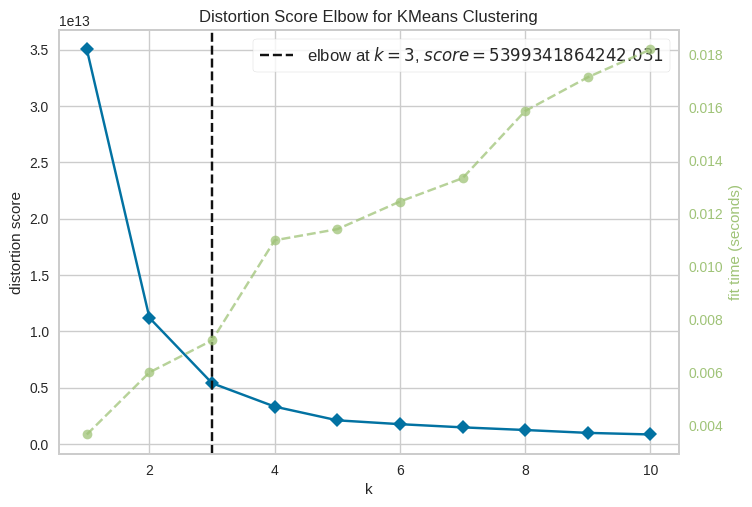

In [ ]:
#Elbow Method
kmeans = KMeans(random_state = 0)
y_kmeans = kmeans.fit_predict(X)
model = KElbowVisualizer(kmeans, k = (1, 11))
model.fit(X)
model.show();



```
# Contoh cara visualisasi hasil clustering
X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data = X, x= 'Income', y= 'Score', hue=X['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()
```



       No  Lokasi  Aktual Harga  Aktual Produksi  Aktual Luas Tanam  \
0       1       1          5006           288577             194599   
1      11      11          5112             7722              12653   
2      12       1          5032           709949              76497   
3      23       1          4878          1622137             121151   
4      34       1          4745          1957305             260823   
..    ...     ...           ...              ...                ...   
103  1123       1          8820           646413              83590   
104  1134       1          8747           150588              68699   
105  1145       1          8725           335396              34712   
106  1156       1          8769          2149952              79631   
107  1167       1          8752           452081             348189   

     Aktual Curah Hujan  Aktual Bencana  Aktual Luas Terkena Hama  \
0                 240.9             1.0                       0.0   
1        

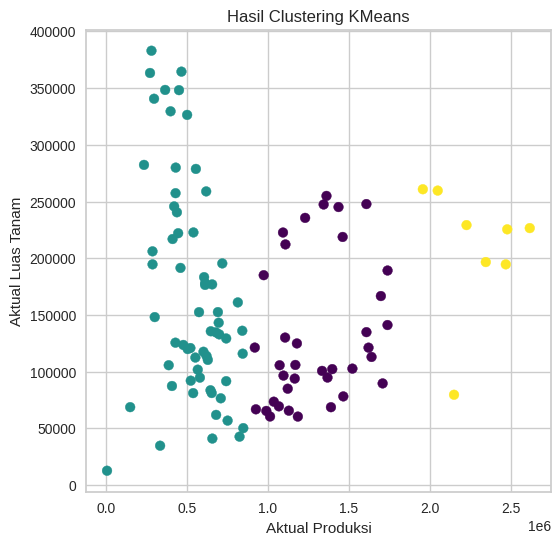

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Aktual Produksi', 'Aktual Luas Tanam', 'Aktual Curah Hujan']])
print(df)

plt.figure(figsize=(6, 6))
plt.scatter(df['Aktual Produksi'], df['Aktual Luas Tanam'], c=df['cluster'], cmap='viridis')
plt.xlabel('Aktual Produksi')
plt.ylabel('Aktual Luas Tanam')
plt.title('Hasil Clustering KMeans')
plt.show()

**Analisis Hasil** : "Ini adalah contoh analisis terhadap hasil clustering yang didapatkan, setiap cluster pada data ini memperlihatkan karakteristik....."



--------------



# Selesai 🐈